In [1]:
import sys
sys.path.insert(0, '../../src')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from LDPC import LDPC
from QC_LDPC import QC_LDPC
from McEliece import McEliece
from utils import gaussjordan

In [9]:
def binaryrank(X):
    A = np.copy(X)
    m, n = A.shape

    A = gaussjordan(A)

    return sum([a.any() for a in A])

In [13]:
def extract_random_information_set(X):
    k, n = X.shape
    
    rng = np.random.default_rng()
    arr = np.arange(n)
    
    rng.shuffle(arr)
    J = arr[:k]
    
    return X[:, J]

In [23]:
ITER_NUM = 50

In [36]:
N = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300]
D_c = [10 for _ in N]
D_v = [8 for _ in N]

probs_ldpc = []
time_ldpc = []

print("Regular LDPC simulation")
for n, d_v, d_c in zip(N, D_v, D_c):
    ldpc = LDPC.from_params(n, d_v, d_c)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_ldpc.append(t)
            
    prob = counter / ITER_NUM
    probs_ldpc.append(prob)
    
    print("n: {}, k: {}, prob: {}, time: {}s".format(n, k, prob, t))

Regular LDPC simulation
n: 300, k: 67, prob: 0.18, time: 0s
n: 500, k: 107, prob: 0.4, time: 1s
n: 700, k: 147, prob: 0.3, time: 3s
n: 900, k: 187, prob: 0.34, time: 6s
n: 1100, k: 227, prob: 0.36, time: 9s
n: 1300, k: 267, prob: 0.26, time: 13s
n: 1500, k: 307, prob: 0.3, time: 17s
n: 1700, k: 347, prob: 0.28, time: 23s
n: 1900, k: 387, prob: 0.26, time: 30s
n: 2100, k: 427, prob: 0.38, time: 40s
n: 2300, k: 467, prob: 0.18, time: 54s


In [39]:
print(probs_ldpc)

[0.18, 0.4, 0.3, 0.34, 0.36, 0.26, 0.3, 0.28, 0.26, 0.38, 0.18]


In [41]:
N = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300]
D_c = [10 for _ in N]
D_v = [8 for _ in N]

probs_irregular_ldpc = []
time_irregular_ldpc = []

print("Irregular LDPC simulation")
for n, d_v, d_c in zip(N, D_v, D_c):
    ldpc = LDPC.from_params(n, d_v, d_c, regular=False)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_irregular_ldpc.append(t)
            
    prob = counter / ITER_NUM
    probs_irregular_ldpc.append(prob)
    
    print("n: {}, k: {}, prob: {}, time: {}s".format(n, k, prob, t))

Irregular LDPC simulation
n: 300, k: 60, prob: 0.06, time: 0s
n: 500, k: 100, prob: 0.3, time: 1s
n: 700, k: 140, prob: 0.06, time: 3s
n: 900, k: 180, prob: 0.02, time: 6s
n: 1100, k: 220, prob: 0.34, time: 8s
n: 1300, k: 260, prob: 0.32, time: 13s
n: 1500, k: 300, prob: 0.24, time: 20s
n: 1700, k: 340, prob: 0.02, time: 23s
n: 1900, k: 380, prob: 0.04, time: 31s
n: 2100, k: 420, prob: 0.28, time: 39s
n: 2300, k: 460, prob: 0.26, time: 53s


In [43]:
print(probs_irregular_ldpc)

[0.06, 0.3, 0.06, 0.02, 0.34, 0.32, 0.24, 0.02, 0.04, 0.28, 0.26]


In [44]:
from math import log

N = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300]
D_c = []
D_v = []

for n in N:
    d_c = int((n * log(n, 2)) ** (0.5))
    
    while n % d_c != 0:
        d_c -= 1
        
    d_v = int(d_c * 8 / 10)
    
    D_v.append(d_v)
    D_c.append(d_c)

probs_mdpc = []
time_mdpc = []

print("Regular MDPC simulation")
for n, d_v, d_c in zip(N, D_v, D_c):
    ldpc = LDPC.from_params(n, d_v, d_c)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_mdpc.append(t)
            
    prob = counter / ITER_NUM
    probs_mdpc.append(prob)
    
    print("n: {}, k: {}, w: {}, prob: {}, time: {}s".format(n, k, d_c, prob, t))

Regular MDPC simulation
n: 300, k: 83, w: 30, prob: 0.28, time: 1s
n: 500, k: 139, w: 50, prob: 0.16, time: 3s
n: 700, k: 195, w: 70, prob: 0.26, time: 6s
n: 900, k: 251, w: 90, prob: 0.34, time: 11s
n: 1100, k: 299, w: 100, prob: 0.3, time: 17s
n: 1300, k: 339, w: 100, prob: 0.24, time: 23s
n: 1500, k: 399, w: 125, prob: 0.28, time: 33s
n: 1700, k: 419, w: 100, prob: 0.32, time: 37s
n: 1900, k: 459, w: 100, prob: 0.28, time: 53s
n: 2100, k: 539, w: 150, prob: 0.24, time: 113s
n: 2300, k: 551, w: 115, prob: 0.28, time: 122s


In [45]:
print(probs_mdpc)

[0.28, 0.16, 0.26, 0.34, 0.3, 0.24, 0.28, 0.32, 0.28, 0.24, 0.28]


In [47]:
from math import log

N = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300]
D_c = []
D_v = []

for n in N:
    d_c = int((n * log(n, 2)) ** (0.5))
    
    while n % d_c != 0:
        d_c -= 1
        
    d_v = int(d_c * 8 / 10)
    
    D_v.append(d_v)
    D_c.append(d_c)

probs_irregular_mdpc = []
time_irregular_mdpc = []

print("Irregular MDPC simulation")
for n, d_v, d_c in zip(N, D_v, D_c):
    ldpc = LDPC.from_params(n, d_v, d_c, regular=False)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_irregular_mdpc.append(t)
            
    prob = counter / ITER_NUM
    probs_irregular_mdpc.append(prob)
    
    print("n: {}, k: {}, w: {}, prob: {}, time: {}s".format(n, k, d_c, prob, t))

Irregular MDPC simulation
n: 300, k: 60, w: 30, prob: 0.32, time: 0s
n: 500, k: 100, w: 50, prob: 0.28, time: 1s
n: 700, k: 140, w: 70, prob: 0.28, time: 3s
n: 900, k: 180, w: 90, prob: 0.24, time: 5s
n: 1100, k: 220, w: 100, prob: 0.3, time: 9s
n: 1300, k: 260, w: 100, prob: 0.36, time: 14s
n: 1500, k: 300, w: 125, prob: 0.34, time: 18s
n: 1700, k: 340, w: 100, prob: 0.42, time: 25s
n: 1900, k: 380, w: 100, prob: 0.32, time: 31s
n: 2100, k: 420, w: 150, prob: 0.36, time: 47s
n: 2300, k: 460, w: 115, prob: 0.32, time: 55s


In [48]:
print(probs_irregular_mdpc)

[0.32, 0.28, 0.28, 0.24, 0.3, 0.36, 0.34, 0.42, 0.32, 0.36, 0.32]


In [49]:
P = [151, 251, 353, 449, 547, 653, 751, 853, 1049, 1153]
N = [p * 2 for p in P]
W = [10 for _ in N]

probs_qc_ldpc = []
time_qc_ldpc = []

print("QC-LDPC simulation")
for n, p, w in zip(N, P, W):
    ldpc = QC_LDPC.from_params(n, p, w)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_qc_ldpc.append(t)
            
    prob = counter / ITER_NUM
    probs_qc_ldpc.append(prob)
    
    print("n: {}, k: {}, w: {}, prob: {}, time: {}s".format(n, k, w, prob, t))

QC-LDPC simulation
n: 302, k: 151, w: 115, prob: 0.22, time: 3s
n: 502, k: 251, w: 115, prob: 0.14, time: 12s
n: 706, k: 353, w: 115, prob: 0.1, time: 26s
n: 898, k: 449, w: 115, prob: 0.24, time: 48s
n: 1094, k: 547, w: 115, prob: 0.12, time: 113s
n: 1306, k: 653, w: 115, prob: 0.14, time: 214s
n: 1502, k: 751, w: 115, prob: 0.04, time: 328s
n: 1706, k: 853, w: 115, prob: 0.04, time: 477s
n: 2098, k: 1049, w: 115, prob: 0.04, time: 866s
n: 2306, k: 1153, w: 115, prob: 0.04, time: 1127s


In [50]:
print(probs_qc_ldpc)

[0.22, 0.14, 0.1, 0.24, 0.12, 0.14, 0.04, 0.04, 0.04, 0.04]


In [52]:
P = [151, 251, 353, 449, 547, 653, 751, 853, 1049, 1153]
N = [p * 2 for p in P]
W = [int((n*log(n, 2))**(0.5)) for n in N]

probs_qc_mdpc = []
time_qc_mdpc = []

print("QC-MDPC simulation")
for n, p, w in zip(N, P, W):
    ldpc = QC_LDPC.from_params(n, p, w)

    crypto = McEliece.from_linear_code(ldpc, 0)

    SGP = crypto.public_key[0]
    k, n = SGP.shape
    
    counter = 0
    start = time.time()
    
    for iter in range(ITER_NUM):
        I = extract_random_information_set(SGP)
        rank = binaryrank(I)
                
        if rank == k:
            counter += 1
            
    end = time.time()
    
    t = int(end - start)
    time_qc_mdpc.append(t)
            
    prob = counter / ITER_NUM
    probs_qc_mdpc.append(prob)
    
    print("n: {}, k: {}, w: {}, prob: {}, time: {}s".format(n, k, w, prob, t))

QC-MDPC simulation
n: 302, k: 151, w: 49, prob: 0.2, time: 3s
n: 502, k: 251, w: 67, prob: 0.2, time: 11s
n: 706, k: 353, w: 81, prob: 0.22, time: 25s
n: 898, k: 449, w: 93, prob: 0.4, time: 49s
n: 1094, k: 547, w: 105, prob: 0.36, time: 119s
n: 1306, k: 653, w: 116, prob: 0.22, time: 206s
n: 1502, k: 751, w: 125, prob: 0.34, time: 323s
n: 1706, k: 853, w: 135, prob: 0.32, time: 469s
n: 2098, k: 1049, w: 152, prob: 0.26, time: 906s
n: 2306, k: 1153, w: 160, prob: 0.3, time: 1163s


In [53]:
print(probs_qc_mdpc)

[0.2, 0.2, 0.22, 0.4, 0.36, 0.22, 0.34, 0.32, 0.26, 0.3]


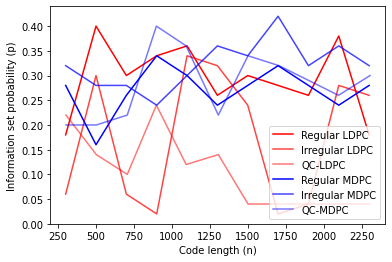

In [65]:
P = [151, 251, 353, 449, 547, 653, 751, 853, 1049, 1153]
QC_Ns = N = [p * 2 for p in P]
Ns = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300]

plt.xlabel('Code length (n)')
plt.ylabel('Information set probability (p)')

plt.plot(Ns, probs_ldpc, label="Regular LDPC", c='#ff0000ff')
plt.plot(Ns, probs_irregular_ldpc, label="Irregular LDPC", c='#ff0000bb')
plt.plot(QC_Ns, probs_qc_ldpc, label="QC-LDPC", c='#ff000088')

plt.plot(Ns, probs_mdpc, label="Regular MDPC", c='#0000ffff')
plt.plot(Ns, probs_irregular_mdpc, label="Irregular MDPC", c='#0000ffbb')
plt.plot(QC_Ns, probs_qc_mdpc, label="QC-MDPC", c='#0000ff88')

plt.legend(loc=4)

plt.savefig("information_set_probability.png", dpi=100)

In [85]:
REPEAT = 6

p = 251
n = 502
W = [i for i in range(6, 30)]

probs2 = []
times2 = []

print("'Fixed n, different w' simulation:")
for w in W:
    t_r = []
    p_r = []
    
    for r in range(REPEAT):
        ldpc = QC_LDPC.from_params(n, p, w)

        crypto = McEliece.from_linear_code(ldpc, 0)

        SGP = crypto.public_key[0]
        k, _ = SGP.shape

        counter = 0
        start = time.time()

        for iter in range(ITER_NUM):
            I = extract_random_information_set(SGP)
            rank = binaryrank(I)

            if rank == k:
                counter += 1

        end = time.time()

        t = int(end - start)
        t_r.append(t)
        
        prob = counter / ITER_NUM
        p_r.append(prob)
        
        print("{}: {}%, {}s".format(r, prob*100, t))
        
    t_s = sum(t_r)
    p_s = sum(p_r) / len(p_r)
    
    times2.append(t_s)
    probs2.append(p_s)
    
    print("w: {}, prob: {}, time: {}s".format(w, p_s, t_s))

'Fixed n, different w' simulation:
0: 0.0%, 11s
1: 0.0%, 11s
2: 0.0%, 11s
3: 0.0%, 11s
4: 0.0%, 11s
5: 0.0%, 11s
w: 6, prob: 0.0, time: 66s
0: 0.0%, 11s
1: 0.0%, 11s
2: 0.0%, 11s
3: 0.0%, 11s
4: 0.0%, 11s
5: 0.0%, 11s
w: 7, prob: 0.0, time: 66s
0: 4.0%, 11s
1: 4.0%, 11s
2: 6.0%, 11s
3: 4.0%, 11s
4: 2.0%, 11s
5: 2.0%, 11s
w: 8, prob: 0.03666666666666667, time: 66s
0: 10.0%, 11s
1: 12.0%, 11s
2: 16.0%, 11s
3: 20.0%, 11s
4: 16.0%, 11s
5: 6.0%, 11s
w: 9, prob: 0.13333333333333333, time: 66s
0: 22.0%, 11s
1: 18.0%, 11s
2: 18.0%, 11s
3: 20.0%, 11s
4: 18.0%, 11s
5: 14.000000000000002%, 11s
w: 10, prob: 0.18333333333333335, time: 66s
0: 14.000000000000002%, 11s
1: 22.0%, 11s
2: 10.0%, 11s
3: 20.0%, 11s
4: 22.0%, 11s
5: 28.000000000000004%, 11s
w: 11, prob: 0.19333333333333333, time: 66s
0: 30.0%, 11s
1: 30.0%, 11s
2: 34.0%, 11s
3: 36.0%, 11s
4: 24.0%, 11s
5: 12.0%, 17s
w: 12, prob: 0.2766666666666666, time: 72s
0: 14.000000000000002%, 13s
1: 34.0%, 11s
2: 22.0%, 11s
3: 34.0%, 11s
4: 20.0%, 11s

In [86]:
print(probs2)

[0.0, 0.0, 0.03666666666666667, 0.13333333333333333, 0.18333333333333335, 0.19333333333333333, 0.2766666666666666, 0.24666666666666667, 0.2733333333333334, 0.3, 0.26, 0.31333333333333335, 0.3066666666666667, 0.26, 0.25666666666666665, 0.26666666666666666, 0.2733333333333334, 0.29000000000000004, 0.34, 0.26333333333333336, 0.33, 0.2866666666666667, 0.32, 0.31666666666666665]


In [111]:
from math import tanh

def my_tanh(x):
    return tanh(x - 10) / 7 + 1/7

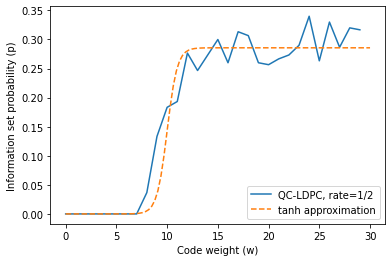

In [121]:
w = [i for i in range(0, 30)]
probs = [0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.03666666666666667, 0.13333333333333333, 0.18333333333333335, 0.19333333333333333, 0.2766666666666666, 0.24666666666666667, 0.2733333333333334, 0.3, 0.26, 0.31333333333333335, 0.3066666666666667, 0.26, 0.25666666666666665, 0.26666666666666666, 0.2733333333333334, 0.29000000000000004, 0.34, 0.26333333333333336, 0.33, 0.2866666666666667, 0.32, 0.31666666666666665]

plt.xlabel('Code weight (w)')
plt.ylabel('Information set probability (p)')

plt.plot(w, probs, label='QC-LDPC, rate=1/2')

x = np.linspace(0, 30, num=100)
y = np.array(list(map(my_tanh, x)))

plt.plot(x, y, linestyle='--', label="tanh approximation")

plt.legend(loc=4)

plt.savefig("tanh_approximation.png", dpi=100)